In [81]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import nan as na
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler as sd
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score


In [82]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Load the dataset directly from the URL
data = pd.read_csv(url)

## Data attributes and statistical analysis

In [83]:
# Display the first few rows
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [84]:
# tail means printing the last 5 records
data.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [85]:
# we need check first wheather our dataset having null values or not
data.isnull().sum() #or data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no missing values

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

data.info() method in pandas provides a concise summary of a DataFrame, including information about the columns and data types.

Observations:

RangeIndex: implying that there are 12330 entries.
Data columns:details about column in the DataFrame.

The DataFrame contains 18 columns.
Each column has 12330 non-null values, indicating that there are no missing values in the DataFrame.
The columns have various data types:
int64: Integer values.
float64: Floating-point values.
object: String or categorical values.
bool: Boolean values.
The memory usage of the DataFrame is approximately 1.5+ MB.

In [87]:
# shape which is really helpful to find numbers of rows and columns
data.shape

(12330, 18)

In [88]:
# when we describe our data set we could see our mean,meadian,min,max and all
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Based on the output:

Administrative: The mean number of administrative pages visited is approximately 2.32, with a standard deviation of around 3.32. The maximum number of administrative pages visited is 27.
Administrative_Duration: The mean duration spent on administrative pages is approximately 80.82 seconds, with a standard deviation of around 176.78 seconds. The maximum duration observed is 3398.75 seconds.

In [89]:
type(data)

pandas.core.frame.DataFrame

In [90]:
# names of the independent features (also known as predictor variables or input variables)
print('Independent Features: ',list(data.columns[:-1]))

Independent Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


 this code snippet is extracting the names of all columns in the DataFrame except for the last one (which is typically the dependent variable or target variable) and printing them out. It's useful for identifying and verifying which columns are considered independent features in the dataset.

In [91]:
print('Target Feature:',list(data.columns[-1:]))

Target Feature: ['Revenue']


In [92]:
# To get value counts for the 'Revenue' column
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

## Data Cleaning

In [93]:
# Create a new DataFrame (data_converted) as a copy of the original data
data_converted = data.copy()

# check the information of the new DataFrame
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [94]:
# Convert from real numbers to categorical

# Define columns to be converted to categorical
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'SpecialDay']

# Convert 'Month' to categorical
data_converted['Month'] = data_converted['Month'].astype('category')

# Convert other specified columns to categorical
data_converted[categorical_columns] = data_converted[categorical_columns].astype('category')

# Convert 'VisitorType' to categorical (assuming it's non-ordinal)
data_converted['VisitorType'] = pd.Categorical(data_converted['VisitorType'])

# Save the new dataset to a CSV file
data_converted.to_csv('data_2.csv', index=False)


In [95]:
from google.colab import files

# Download the CSV file to local drive
files.download('data_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [97]:
data_converted.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#Analysis and Visualization

In [98]:
#Here below we splited the numerical and catagorical columns

num_cols=[col for col in data_converted.select_dtypes(include=np.number)]
cat_cols=[col for col in data_converted.select_dtypes(exclude=np.number)]

print('Numerical column:',len(num_cols),'catagorcal column:',len(cat_cols))
print('Numerical Column Names:',num_cols)
print('catagorcial Column Names:',cat_cols)


Numerical column: 9 catagorcal column: 9
Numerical Column Names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
catagorcial Column Names: ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


# Density plot for numerical columns

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

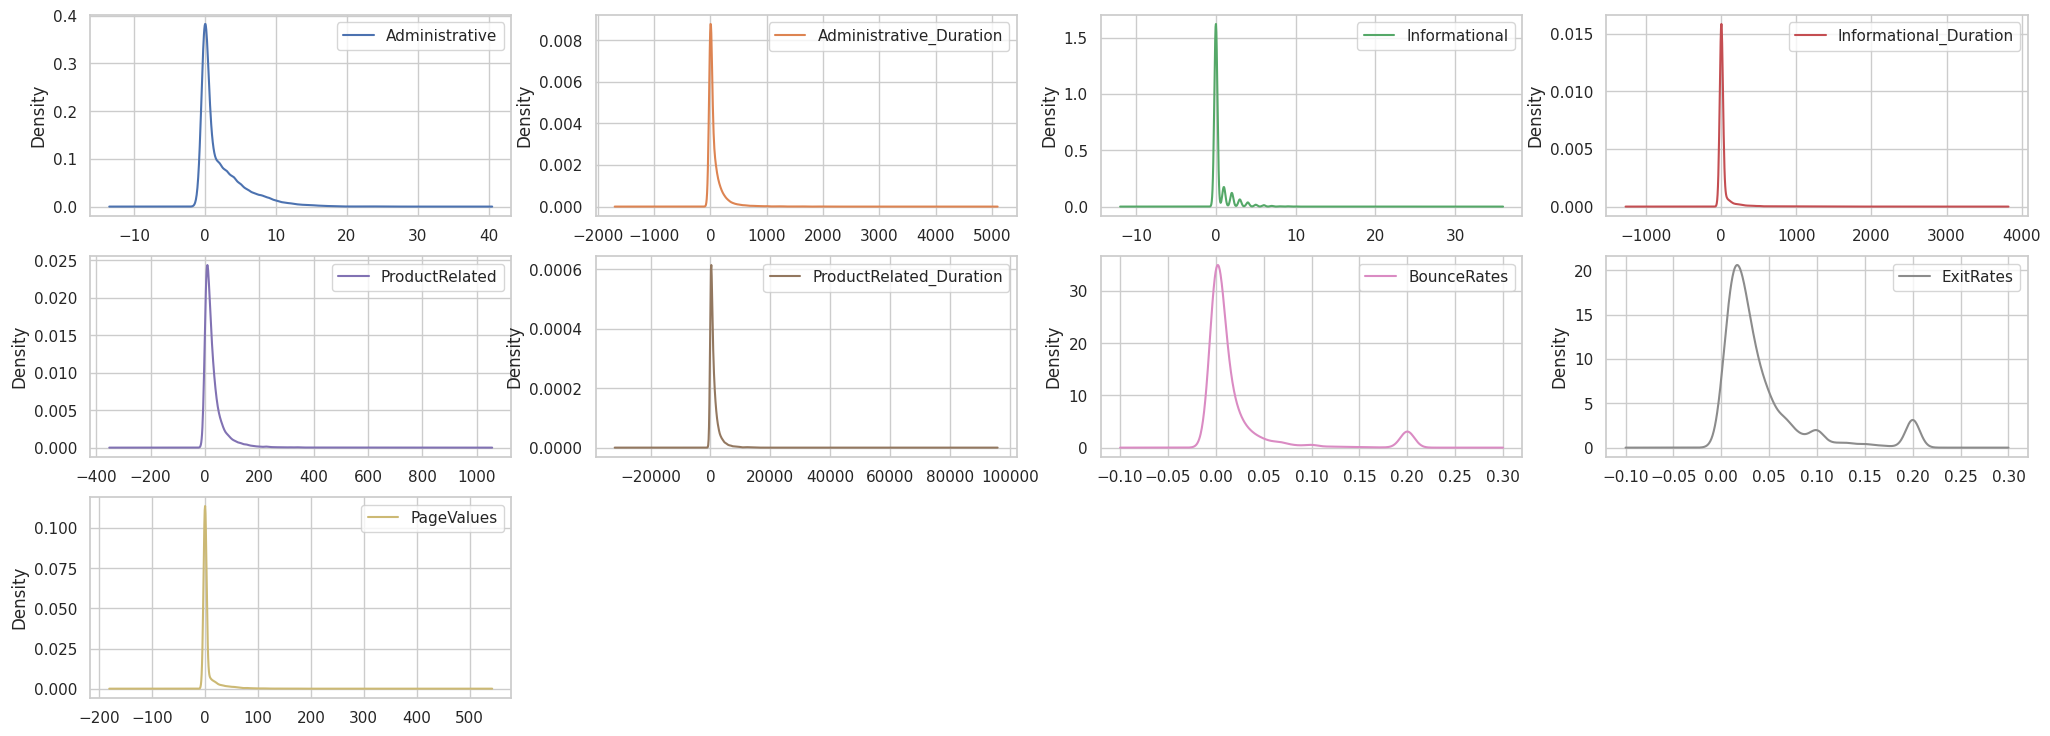

In [99]:
# Create density plots for numerical columns
data[num_cols].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(25, 12))

Density plots provide insights into the distribution of data values for each numerical variable. They help in understanding the shape of the data distribution, and we can see most of them are right skewed, whereas ExitRate has slight multimodal distribution.

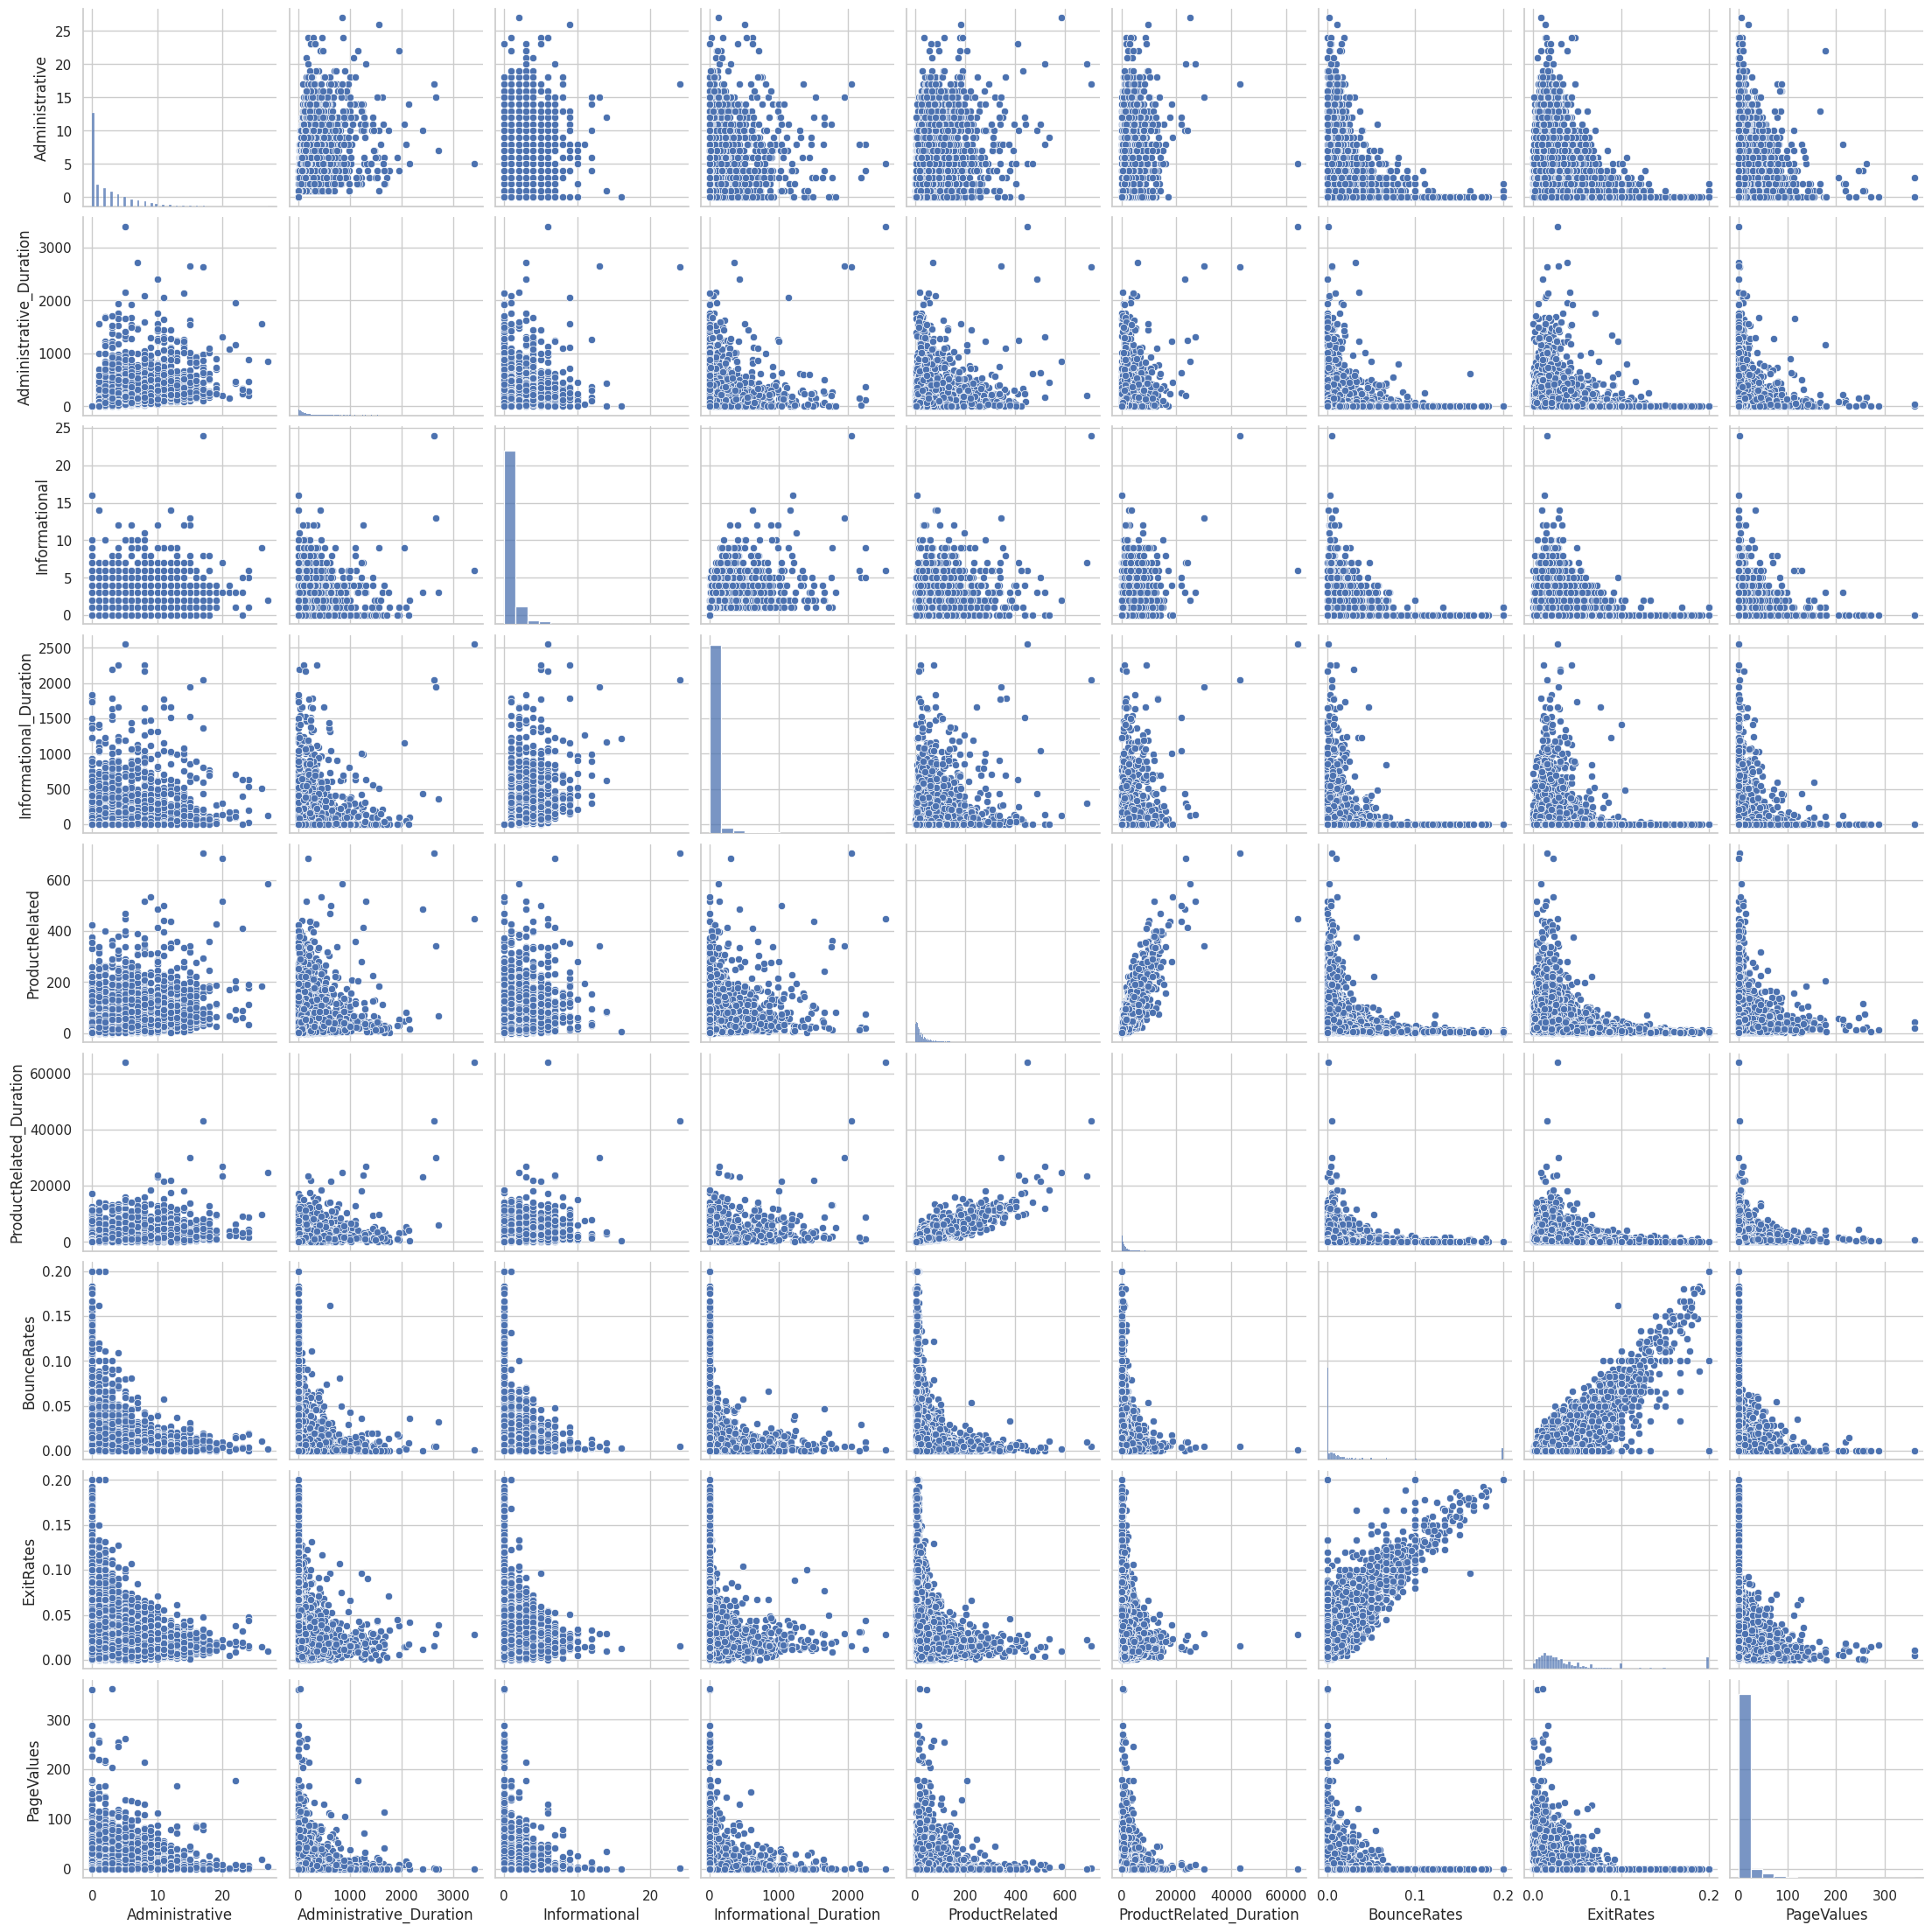

In [100]:
import seaborn as sns

# Create scatter plot matrix using seaborn
# sns.pairplot(data_converted[numerical_cols])
sns.pairplot(data_converted[num_cols])
plt.show()

# Box-and-whisker plots for numerical col

Administrative                Axes(0.125,0.712609;0.168478x0.167391)
Administrative_Duration    Axes(0.327174,0.712609;0.168478x0.167391)
Informational              Axes(0.529348,0.712609;0.168478x0.167391)
Informational_Duration     Axes(0.731522,0.712609;0.168478x0.167391)
ProductRelated                Axes(0.125,0.511739;0.168478x0.167391)
ProductRelated_Duration    Axes(0.327174,0.511739;0.168478x0.167391)
BounceRates                Axes(0.529348,0.511739;0.168478x0.167391)
ExitRates                  Axes(0.731522,0.511739;0.168478x0.167391)
PageValues                     Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

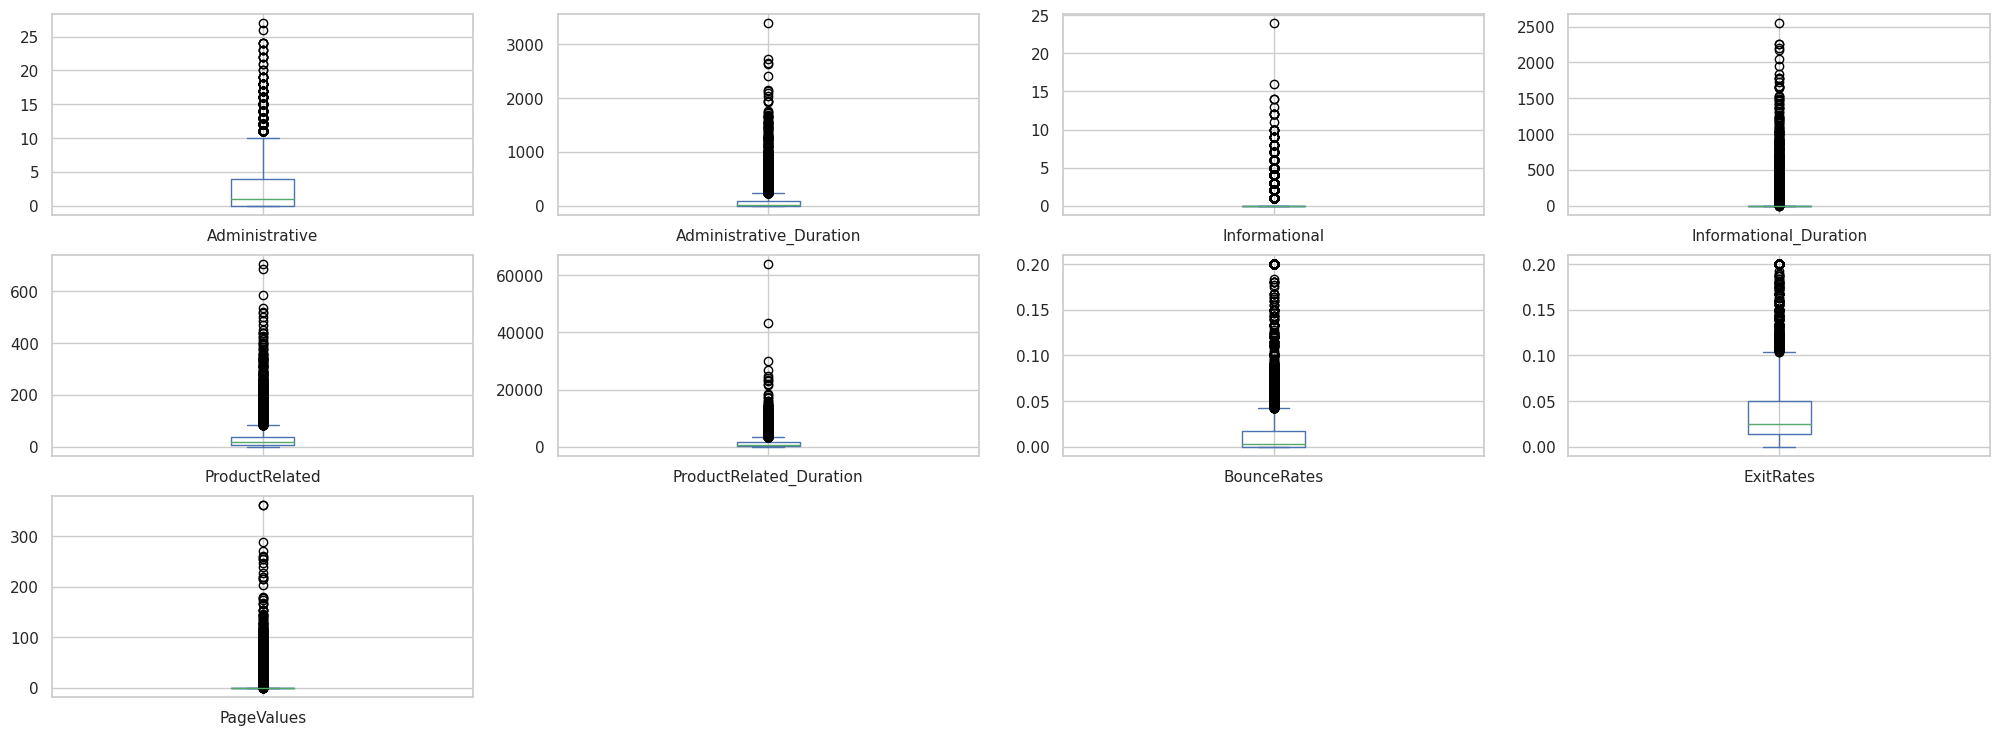

In [101]:
#Print the box plot for numerical col
#data_converted[numerical_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))
data_converted[num_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))

There are a significant number of data points in each attribute that fall far outside the typical range of values observed for that attribute. Depending on the context of your analysis, we can handle outliers differently, such as removing them, transforming them, or analyzing them separately. There are several reasons why we choose not to deal with outliers:
Realistic Representation: In e-commerce and online shopping behavior, outliers could represent genuine instances of extreme purchasing behavior, such as high-value transactions or unusual browsing pattern. data may contain valuable insights into consumer preferences, buying habits, or exceptional events such as promotions, sales, or seasonal trends. Decision-makers in e-commerce companies may prioritize understanding the entire spectrum of customer behavior, including outliers, to make informed business decisions. Removing outliers could obscure important insights and hinder strategic decision-making.
in the context of the Online Shoppers Purchasing Intention Dataset and its potential for right-skewed distributions with significant outliers, retaining and analyzing outliers can provide valuable insights for business strategy, marketing tactics, revenue optimization, and customer engagement.

## Imbalance dataset

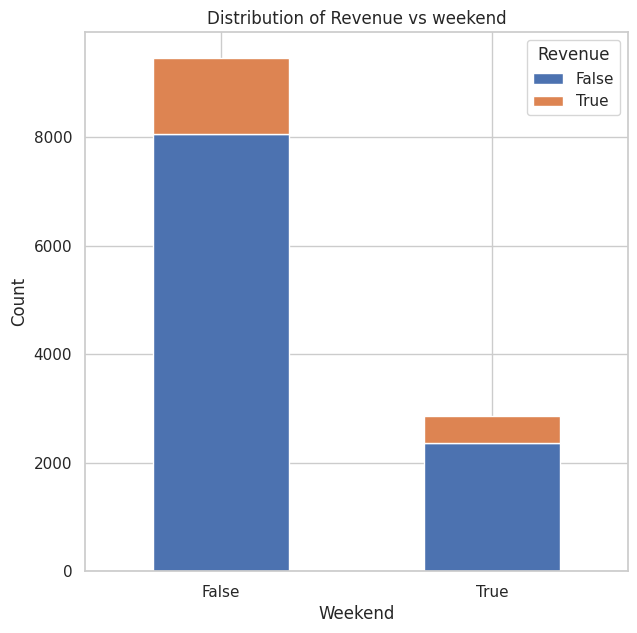

In [102]:
import matplotlib.pyplot as plt

data_converted.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7,7))
plt.title("Distribution of Revenue vs weekend")  # Add figure name
plt.xlabel("Weekend")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Revenue")
plt.show()


The dataset exhibits some imbalance, with only 15% of sessions resulting in a purchase. Although this imbalance isn’t severe, we can still explore techniques or algorithms that handle such scenarios effectively.

## Importance of Page Values

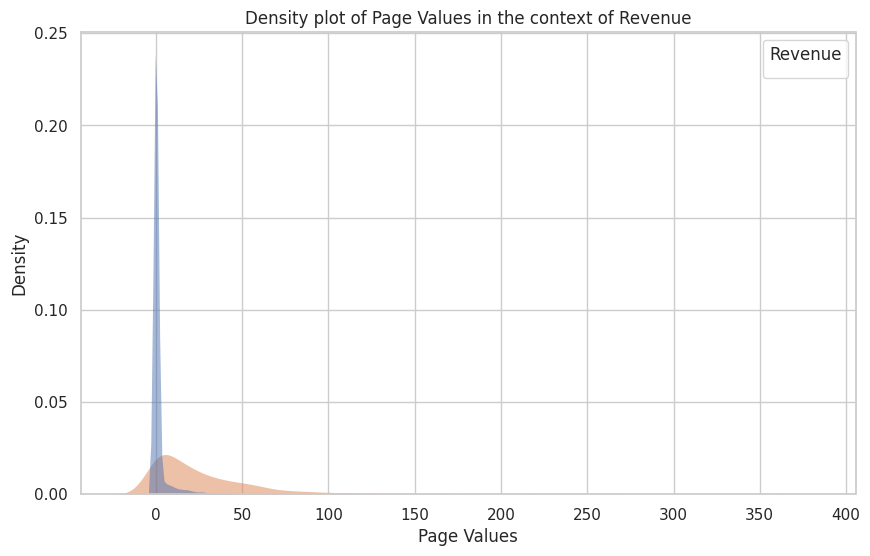

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a density plot of PageValues with hue as Revenue
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_converted, x='PageValues', hue='Revenue', fill=True, common_norm=False, alpha=0.5, linewidth=0)
plt.title('Density plot of Page Values in the context of Revenue')
plt.xlabel('Page Values')
plt.ylabel('Density')
plt.legend(title='Revenue', loc='upper right')
plt.show()


In e-commerce, PageValues represent the average value of pages visited by users. Specifically, it assigns importance to pages like checkout or those leading up to checkout. Notably, a PageValues above 5 significantly boosts the likelihood of purchase conversion. Thus, this feature serves as a robust indicator of user purchase intent.

<ipython-input-104-ea12caea34fb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
<ipython-input-104-ea12caea34fb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)


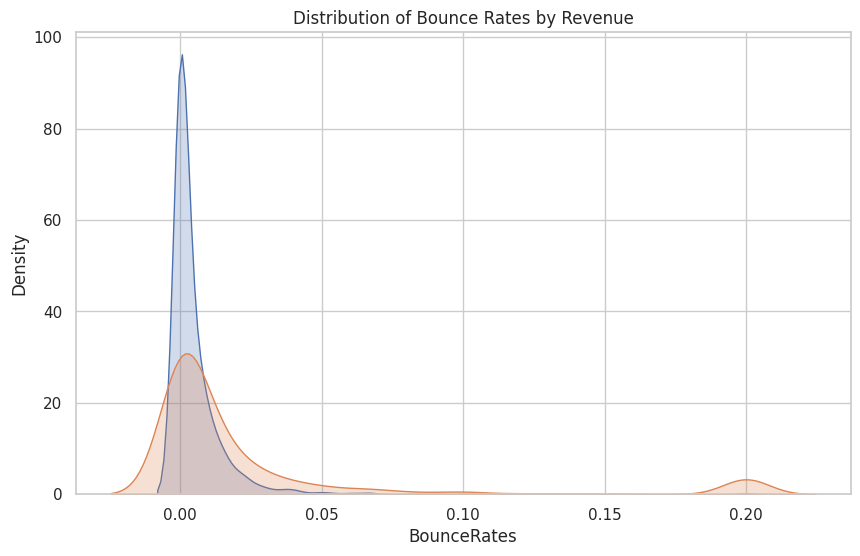

In [104]:
# Example for Bounce Rates
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)
plt.title('Distribution of Bounce Rates by Revenue')
plt.show()


In [105]:
#Visitor type
data_converted['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<Axes: >

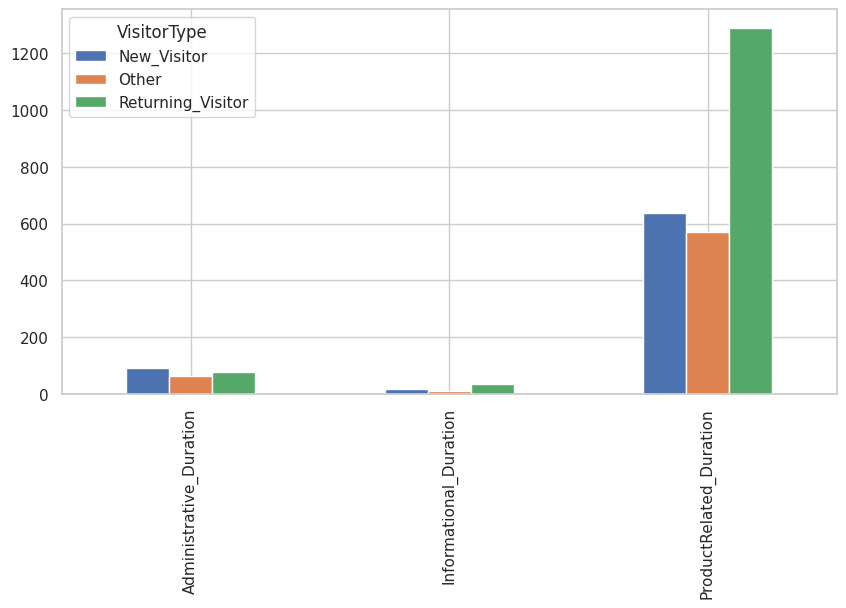

In [106]:
admin_dpt=data_converted[['Administrative_Duration','ProductRelated_Duration','Informational_Duration','VisitorType']]

pd.pivot_table(admin_dpt,values=['Administrative_Duration','ProductRelated_Duration','Informational_Duration'],columns=['VisitorType'],aggfunc='mean').plot(kind='bar',figsize=(10,5))


# Correlation

In [107]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data_converted['Month']=data_converted['Month'].map(Month)


In [108]:
VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
data_converted['VisitorType']=data_converted['VisitorType'].map(VisitorType)


<ipython-input-109-45f4c0e79021>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

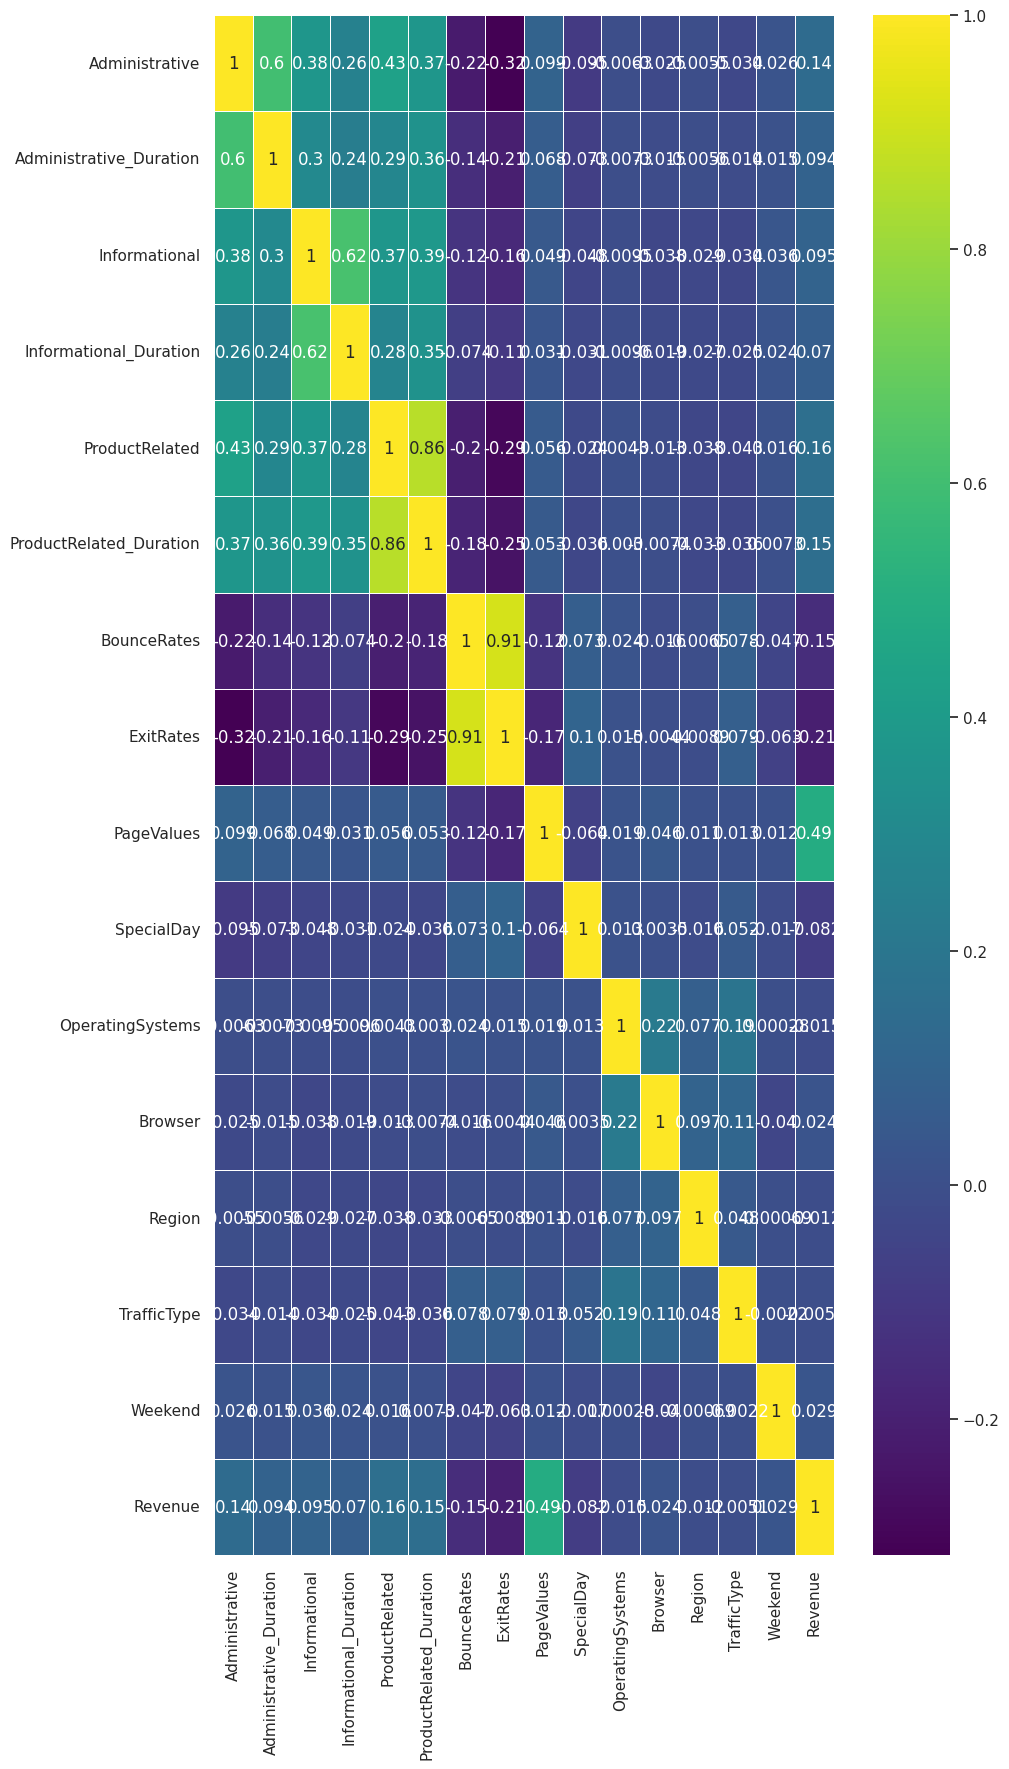

In [109]:


d={True:1,False:0}
data['Weekend']=data['Weekend'].map(d)
data['Revenue']=data['Revenue'].map(d)
plt.figure(figsize=(10,20))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)


* The statistical test used to investigate the correlation between the variables plotted in the heatmap is Pearson's correlation coefficient. Pearson's correlation coefficient measures the linear relationship between two continuous variables. It ranges from -1 to +1, where:

+1 indicates a perfect positive linear relationship,
0 indicates no linear relationship, and
-1 indicates a perfect negative linear relationship.
In the context of the heatmap, each cell represents the Pearson correlation coefficient between two variables.

**PageViews and Browsing Duration: Higher pageviews and longer browsing durations correlate positively with PageValues. This makes sense, as engaged users tend to explore more pages and spend more time on an e-commerce site. For instance, if a user has a specific item in mind, they might compare prices and read reviews, increasing the likelihood of a purchase.**

**ExitRates and BounceRates: Conversely, ExitRates, which represents the average exit rate of visited pages, is negatively correlated with PageValues. Additionally, ExitRates and BounceRates are positively related. This aligns with our hypothesis: sessions with high exit rates or bounce rates indicate less engagement, leading to fewer conversions.* ***

## Right-skewed feature distribution

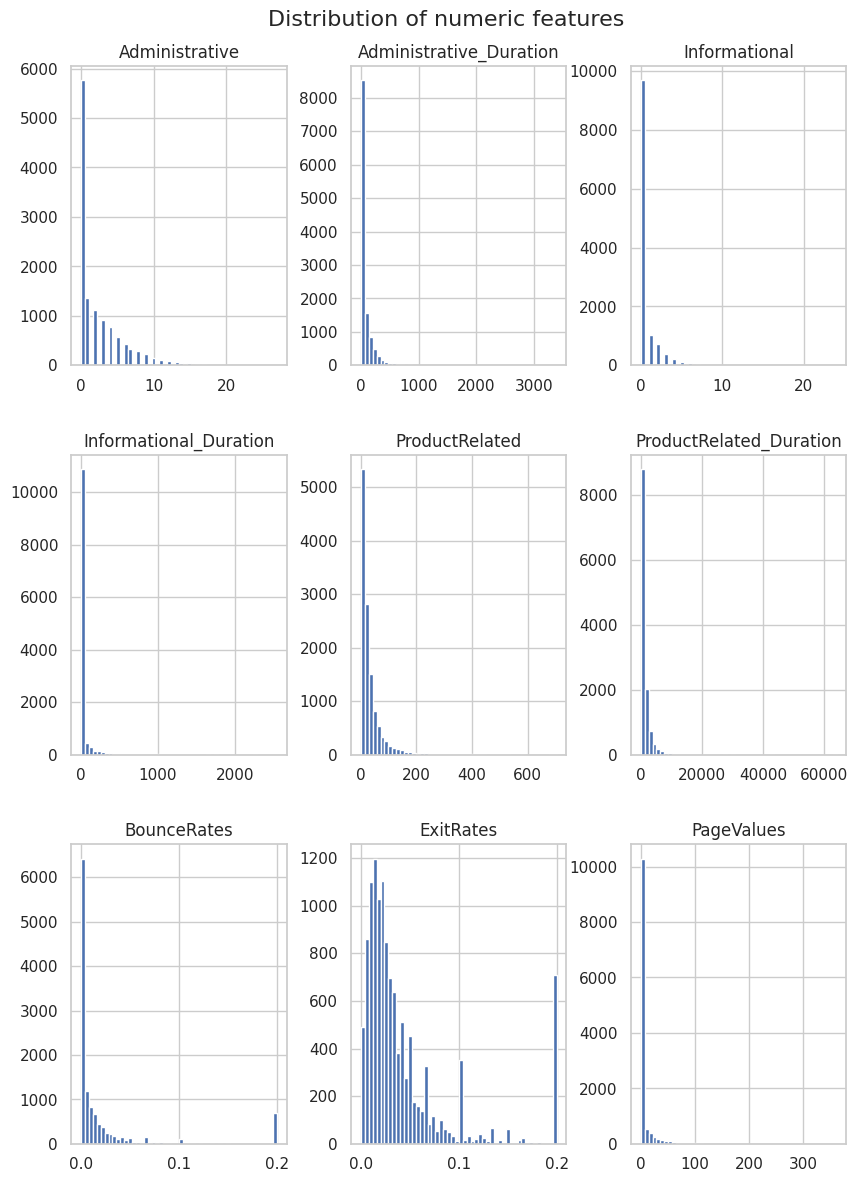

In [110]:
import matplotlib.pyplot as plt

# Plot the histogram of numeric features
data_converted.hist(bins=50, figsize=(10, 14))

# Add headline
plt.suptitle("Distribution of numeric features", fontsize=16, y=0.92)

plt.show()


it’s typical to observe right-skewed distributions for numeric features. These skewed tails indicate that a subset of users exhibits exceptionally high usage patterns.

## Page Matrix analysis:

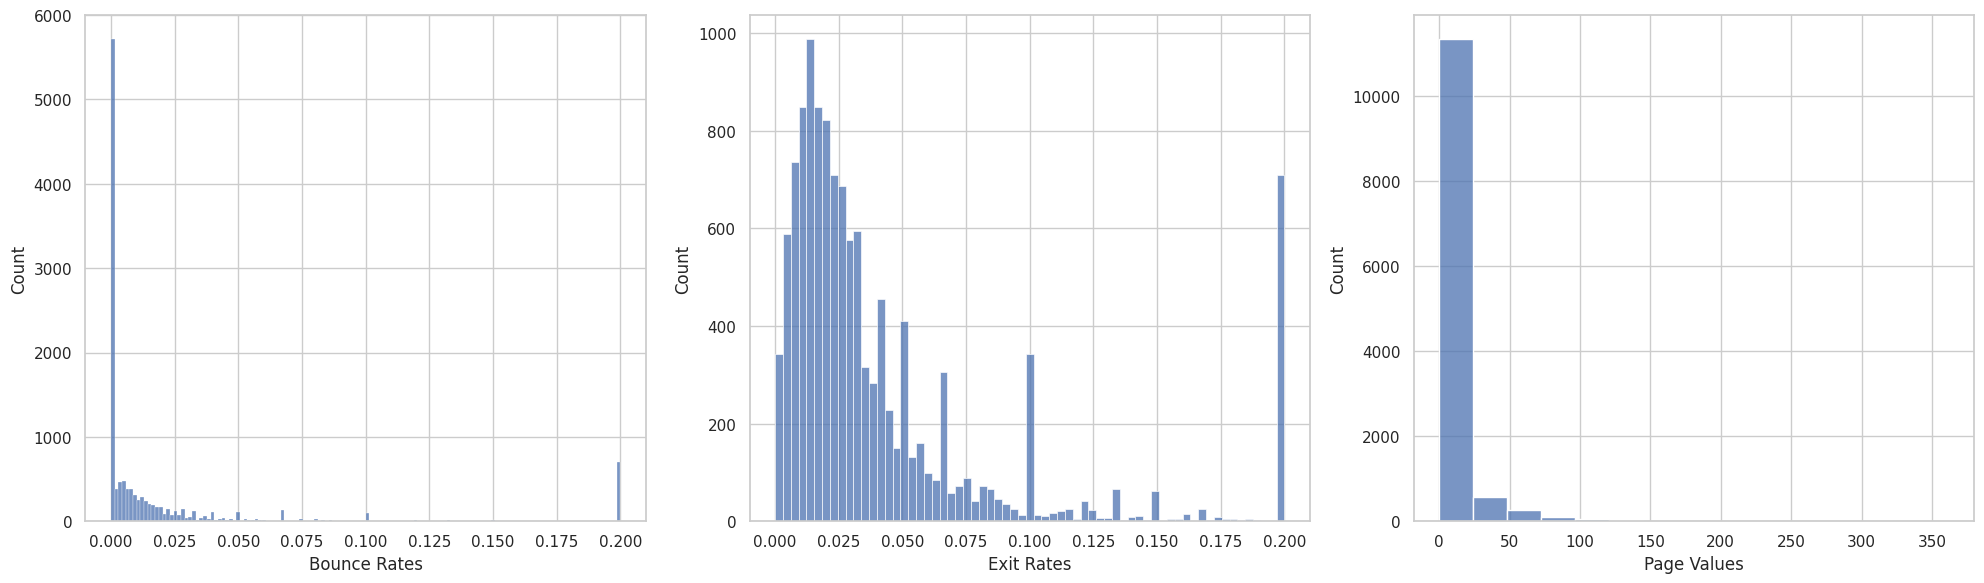

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data['BounceRates'], ax=axes[0])
axes[0].set_xlabel('Bounce Rates')

sns.histplot(data['ExitRates'], ax=axes[1])
axes[1].set_xlabel('Exit Rates')

sns.histplot(data['PageValues'], ax=axes[2])
axes[2].set_xlabel('Page Values')

plt.tight_layout()
plt.show()


The above distribution plots of Page Metrics show the following:

* All 3 features have distributions that are right skewed with a lot of outliers.
* The average bounce rate of most of our data points is low. This is a positive observation as high rates would identicate that visitors are not engaging with the website.
* Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to increase.

## Revenue Analysis

In [112]:
data.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

0 represents False and 1 represents True

In [113]:
revenue_ratio = data.Revenue.value_counts(normalize=True)
revenue_ratio

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

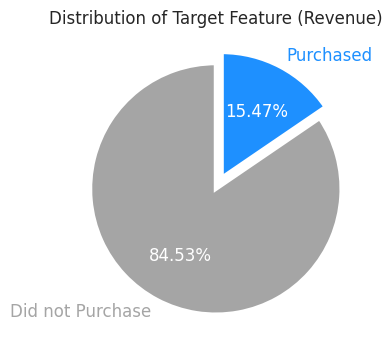

In [114]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='dodgerblue'
labels = ['Did not Purchase','Purchased']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribution of Target Feature (Revenue)', fontsize=12)
plt.tight_layout()

Imbalance in the output variable, where 84.53% didnot purchase.

Revenue by visitor type"

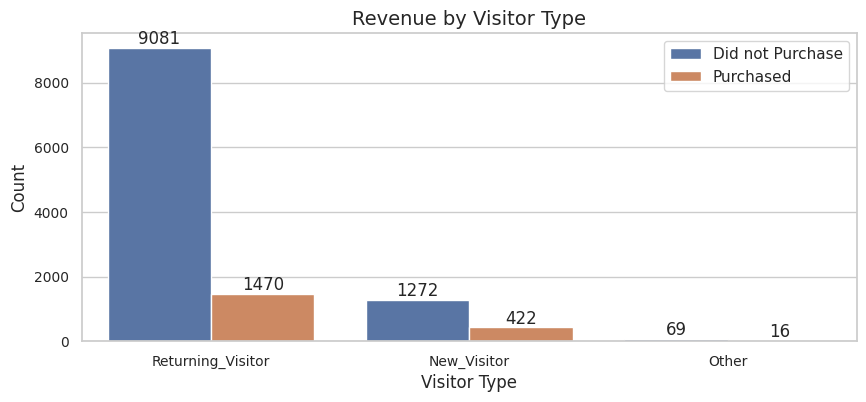

In [115]:
plt.figure(figsize=(10,4))
plt.title("Revenue by Visitor Type", fontsize=14)
ax = sns.countplot(x='VisitorType', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Revenue by Month:

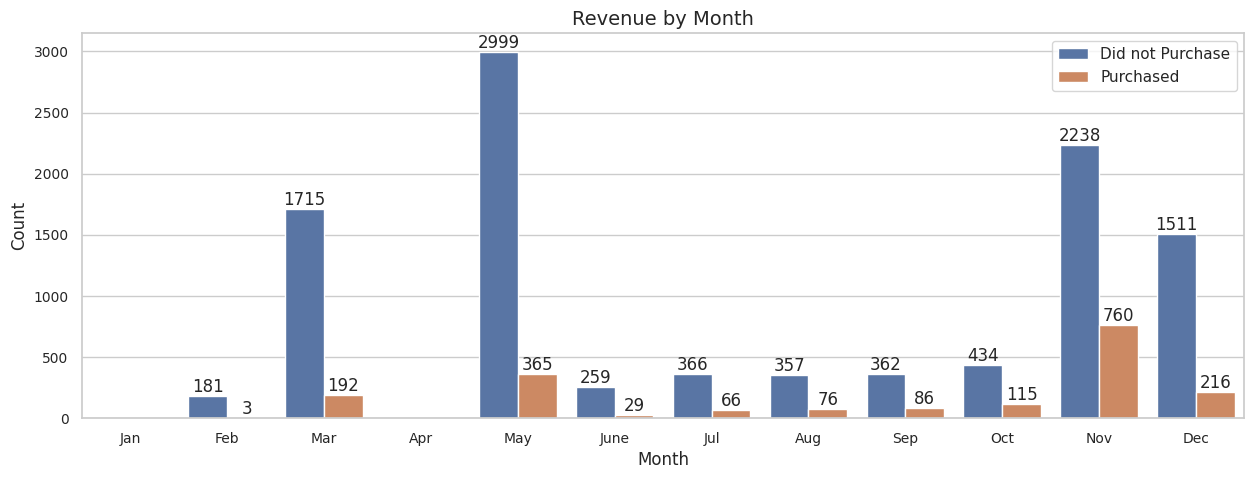

In [116]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=data, hue = 'Revenue', order=orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* No data found for January and April
* Lot of the transaction happned at the end of the year

Revenue by Special Day:


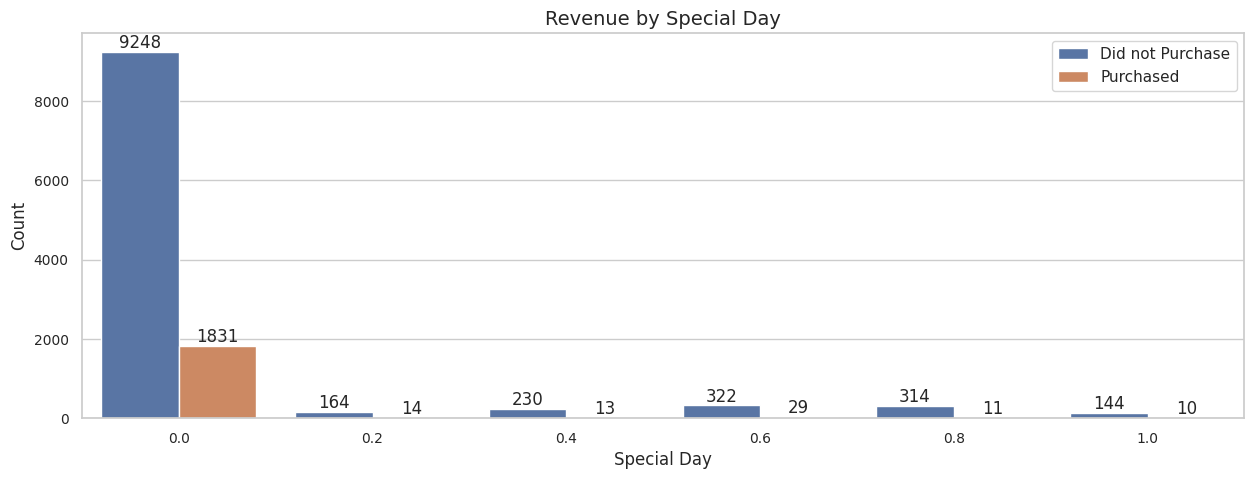

In [117]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Special Day", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***There were significantly more website visitors and revenue generated (Completed purchases) on Special Day 0.0 in comparison to the other special days.***

Revenue by page type/ Duration

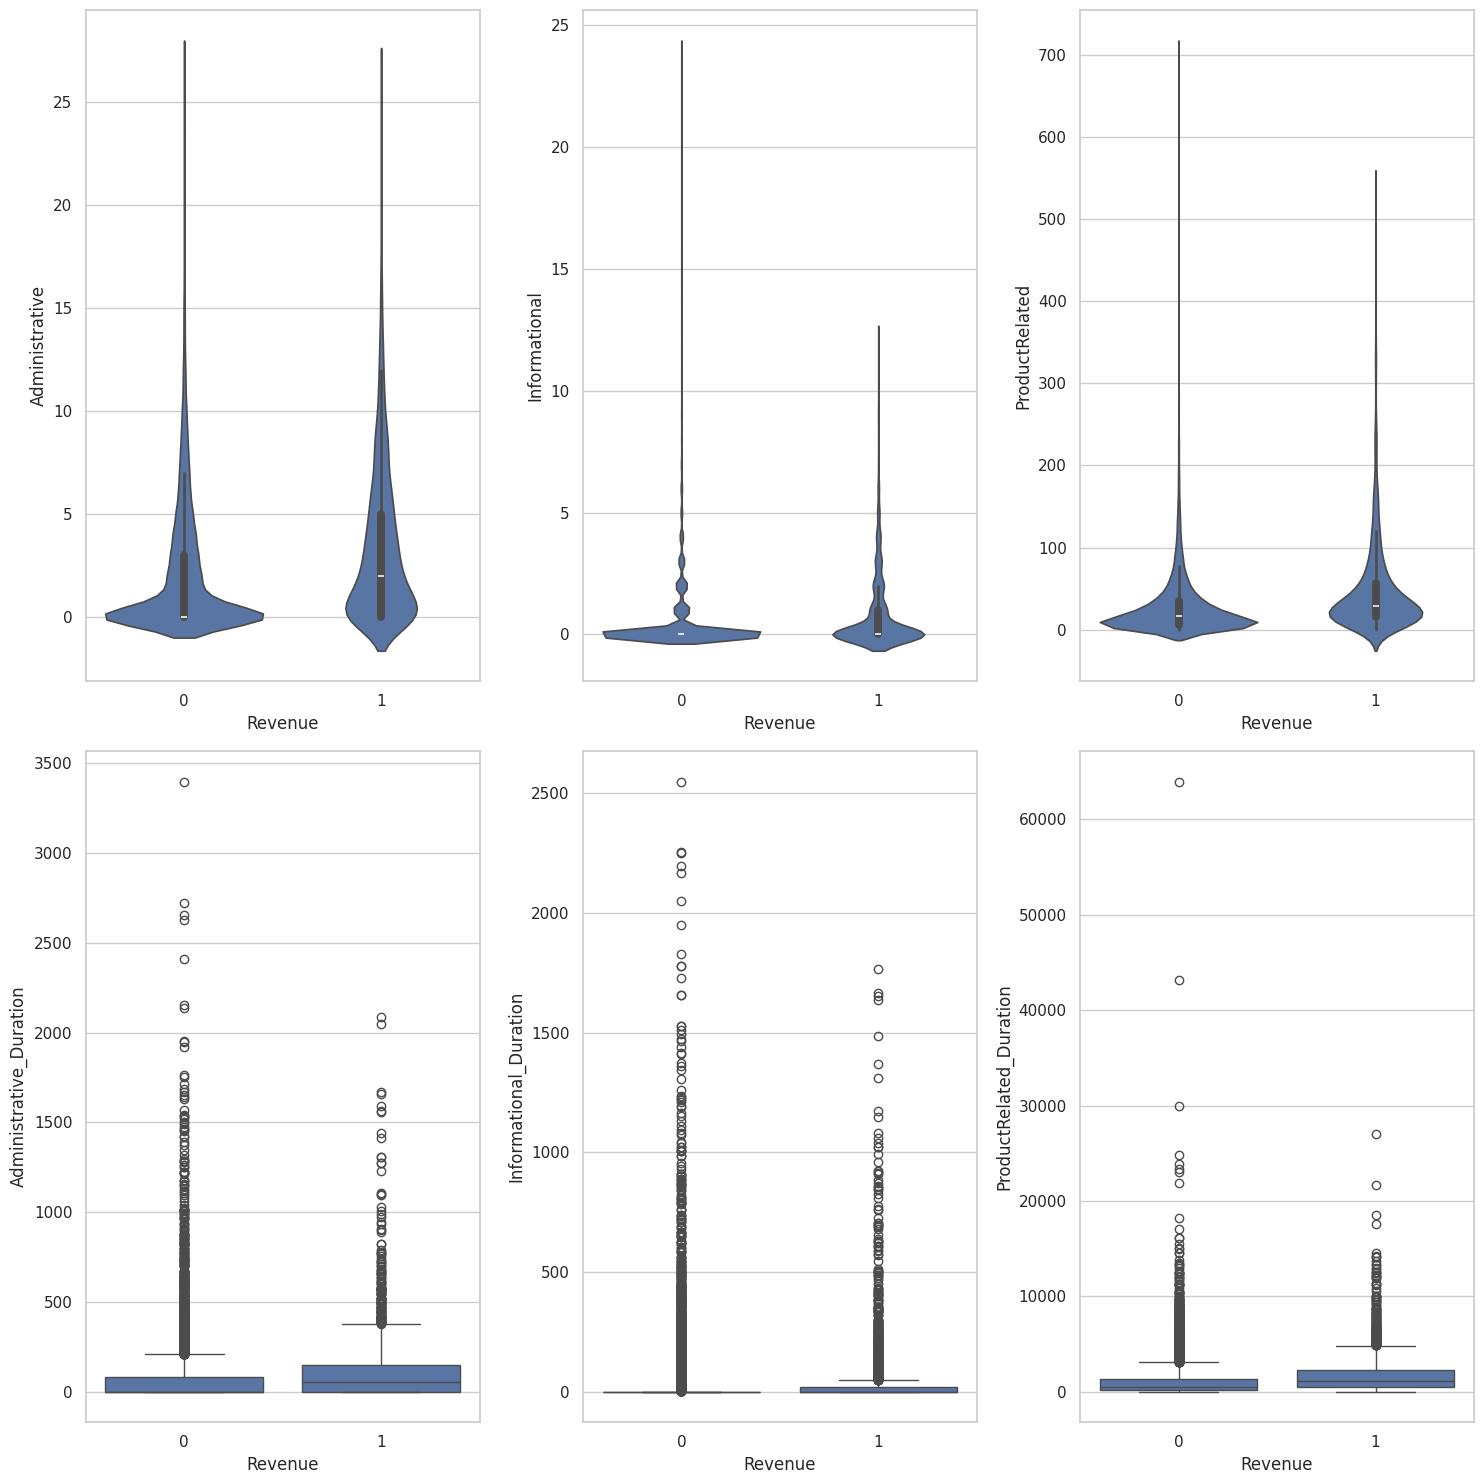

In [118]:
  fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

* ***Visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.***
* ***The number of product related pages visited and time spent on them is more than that for account related or informational pages.***

# Model selection


In our model evaluation, we must consider the context of Type I and Type II errors:

Type I Error (False Positive): Predicting a customer will make a purchase when they actually do not.
Type II Error (False Negative): Predicting a customer will not make a purchase when they actually do.
Next, let’s align with the business objectives of an e-commerce company that might use this model. We assume their goals are twofold:

Maximize Revenue: Achieve a higher purchase conversion rate.
Minimize Disruption: Avoid negatively impacting the customer experience through targeted nudges.
Given this context, the relevant metrics include precision and recall. Specifically, we aim to maximize recall while ensuring a minimum threshold of 60% precision, as dictated by business requirements and tolerance. This approach ensures that we capture as many potential buyers as possible while minimizing the risk of falsely targeting customers who are unlikely to make a purchase.

## Baseline Model

To build a baseline model using the DummyClassifier from scikit-learn with the default parameters while ensuring that the dataset is properly prepared without any bias or information leakage, we should follow these steps:

Feature Selection: Decide whether to select the features before splitting the dataset or only on the training set after splitting. It's generally recommended to select features after splitting the dataset to prevent information leakage. We'll select features after splitting.
Prepare Dataset: Since we've already converted certain columns to categorical and saved the modified dataset as 'data_2.csv', we'll load this dataset and split it into training and testing sets.
Build Baseline Model: Create a baseline model using the DummyClassifier with the default strategy parameter 'prior'.

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the DummyClassifier with the default strategy parameter 'prior'
dummy_model = DummyClassifier(strategy='prior')

# Train the baseline model
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dummy = dummy_model.predict(X_test)

# Evaluate the baseline model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print("Baseline Model Accuracy:", accuracy_dummy)


Baseline Model Accuracy: 0.8333333333333334


This code ensures that the dataset is properly prepared without any bias or information leakage by selecting features after splitting. It then builds a baseline model using the DummyClassifier with the default strategy parameter 'prior' and evaluates its accuracy.

The baseline model accuracy of approximately 0.83, or 83.33%, means that the DummyClassifier, which always predicts the class that maximizes the class prior (the majority class), correctly predicts the target variable (Revenue) for approximately 83.33% of the instances in the test set.

In other words, the baseline model, which makes predictions without any actual learning or intelligence, achieves an accuracy of around 83.33%. This accuracy indicates how often the model's predictions align with the true values in the test set.

However, it's essential to interpret this accuracy in the context of the dataset and the business problem. In this case, accuracy alone might not provide a complete picture, especially if the dataset is imbalanced or if certain types of errors (e.g., false positives or false negatives) are more costly than others.

Therefore, while the baseline accuracy of 83.33% provides a starting point for model evaluation, it's crucial to consider other metrics and conduct further analysis to assess the model's performance comprehensively.

Decision Tree

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define pipeline including preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8333333333333334
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.83      1.00      0.91      2055
        True       0.00      0.00      0.00       411

    accuracy                           0.83      2466
   macro avg       0.42      0.50      0.45      2466
weighted avg       0.69      0.83      0.76      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define pipeline including preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred, zero_division='warn'))


Decision Tree Accuracy: 0.8333333333333334
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.83      1.00      0.91      2055
        True       0.00      0.00      0.00       411

    accuracy                           0.83      2466
   macro avg       0.42      0.50      0.45      2466
weighted avg       0.69      0.83      0.76      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Models tested

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('KNN Classifier', KNeighborsClassifier()),
    ('Random Forest Classifier', RandomForestClassifier())
]

# Iterate over models for evaluation
for model_name, model in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print model name and accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.8475
SVM (RBF kernel) Accuracy: 0.8475
KNN Classifier Accuracy: 0.8325
Random Forest Classifier Accuracy: 0.8475


In [123]:
# hyperparameter tuning using GridSearchCV for each classifie

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define models with their respective hyperparameters grid for tuning
models = [
    ('Logistic Regression', LogisticRegression(), {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    ('SVM (RBF kernel)', SVC(kernel='rbf'), {'model__C': [0.001, 0.01, 0.1, 1, 10, 100], 'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}),
    ('KNN Classifier', KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7, 9, 11]}),
    ('Random Forest Classifier', RandomForestClassifier(), {'model__n_estimators': [50, 100, 150, 200]}),
    ('Decision Tree Classifier', DecisionTreeClassifier(), {'model__max_depth': [None, 10, 20, 30, 40, 50]})
]

# Iterate over models for evaluation
for model_name, model, param_grid in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform GridSearchCV for hyperparameter tuning and cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set using the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print model name, best parameters, and accuracy
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Logistic Regression Best Parameters: {'model__C': 0.001}
Logistic Regression Accuracy: 0.8475
SVM (RBF kernel) Best Parameters: {'model__C': 0.001, 'model__gamma': 0.001}
SVM (RBF kernel) Accuracy: 0.8475
KNN Classifier Best Parameters: {'model__n_neighbors': 7}
KNN Classifier Accuracy: 0.8475
Random Forest Classifier Best Parameters: {'model__n_estimators': 50}
Random Forest Classifier Accuracy: 0.8475
Decision Tree Classifier Best Parameters: {'model__max_depth': None}
Decision Tree Classifier Accuracy: 0.8475


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('KNN Classifier', KNeighborsClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier())  # Add Decision Tree Classifier
]

# Iterate over models for evaluation
for model_name, model in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print model name and accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.8475
SVM (RBF kernel) Accuracy: 0.8475
KNN Classifier Accuracy: 0.8325
Random Forest Classifier Accuracy: 0.8475
Decision Tree Classifier Accuracy: 0.8475


Logistic Regression

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define hyperparameters grid for Logistic Regression
param_grid = {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define pipeline including preprocessing and Logistic Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy for Logistic Regression
print("Logistic Regression Best Parameters:", grid_search.best_params_)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Best Parameters: {'model__C': 0.001}
Logistic Regression Accuracy: 0.8475263584752636


Support Vector Machine (SVM) classifier with RBF kernel

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define hyperparameters grid for SVM with RBF kernel
param_grid = {'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define pipeline including preprocessing and SVM model with RBF kernel
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(kernel='rbf'))
])

# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy for SVM with RBF kernel
print("SVM with RBF Kernel Best Parameters:", grid_search.best_params_)
print("SVM with RBF Kernel Accuracy:", accuracy)


SVM with RBF Kernel Best Parameters: {'model__C': 0.001, 'model__gamma': 0.001}
SVM with RBF Kernel Accuracy: 0.8475263584752636


K-Nearest Neighbors (KNN) Classifier

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define hyperparameters grid for KNN Classifier
param_grid = {'model__n_neighbors': [3, 5, 7, 9, 11]}

# Define pipeline including preprocessing and KNN Classifier model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])

# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy for KNN Classifier
print("KNN Classifier Best Parameters:", grid_search.best_params_)
print("KNN Classifier Accuracy:", accuracy)


KNN Classifier Best Parameters: {'model__n_neighbors': 7}
KNN Classifier Accuracy: 0.8475263584752636


Random Forest Classifie

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define hyperparameters grid for Random Forest Classifier
param_grid = {'model__n_estimators': [50, 100, 150, 200]}

# Define pipeline including preprocessing and Random Forest Classifier model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy for Random Forest Classifier
print("Random Forest Classifier Best Parameters:", grid_search.best_params_)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Best Parameters: {'model__n_estimators': 50}
Random Forest Classifier Accuracy: 0.8475263584752636


Decision Tree

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define hyperparameters grid for Decision Tree Classifier
param_grid = {'model__max_depth': [None, 10, 20, 30, 40, 50],
              'model__min_samples_split': [2, 5, 10],
              'model__min_samples_leaf': [1, 2, 4]}

# Define pipeline including preprocessing and Decision Tree Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy for Decision Tree Classifier
print("Decision Tree Classifier Best Parameters:", grid_search.best_params_)
print("Decision Tree Classifier Accuracy:", accuracy)


Decision Tree Classifier Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Decision Tree Classifier Accuracy: 0.8475263584752636


considering cross validation:

In [130]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # handle_unknown='ignore' handles unknown categories
])

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('KNN Classifier', KNeighborsClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier())  # Include Decision Tree Classifier
]

# Iterate over models for evaluation
for model_name, model in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

    # Print model name and average accuracy across folds
    print(f"{model_name} Average Accuracy: {cv_scores.mean():.4f}")


Logistic Regression Average Accuracy: 0.8453
SVM (RBF kernel) Average Accuracy: 0.8453
KNN Classifier Average Accuracy: 0.6157
Random Forest Classifier Average Accuracy: 0.8453
Decision Tree Classifier Average Accuracy: 0.8453


## Evaluation of the classifiers:

To evaluate the proposed classifiers from three perspectives: effectiveness, efficiency, and stability, we need to define specific measures for each perspective. Here's a plan for evaluating the classifiers:

Effectiveness:

Accuracy: Measures the overall correctness of the model's predictions.

Precision: Measures the ratio of true positive predictions to the total predicted positives. It indicates the model's ability to avoid false positives.

Recall (Sensitivity): Measures the ratio of true positive predictions to the total actual positives. It indicates the model's ability to capture all positive instances.

F1-Score: Harmonic mean of precision and recall, providing a balance between the two metrics.

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from time import time

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features)
])

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('KNN Classifier', KNeighborsClassifier()),
    ('Random Forest Classifier', RandomForestClassifier())
]

# Initialize lists to store evaluation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
execution_times = []
confusion_matrices = []
classification_reports = []

# Iterate over models for evaluation
for model_name, model in models:
    start_time = time()  # Start time for measuring efficiency

    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix and classification report for further analysis
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # End time for measuring efficiency
    end_time = time()
    execution_time = end_time - start_time

    # Append evaluation results to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    execution_times.append(execution_time)
    confusion_matrices.append(conf_matrix)
    classification_reports.append(class_report)

# Create DataFrames for evaluation results
accuracy_df = pd.DataFrame({'Model': [model[0] for model in models], 'Accuracy': accuracy_scores})
precision_recall_f1_df = pd.DataFrame({'Model': [model[0] for model in models], 'Precision': precision_scores,
                                       'Recall': recall_scores, 'F1-Score': f1_scores})
execution_time_df = pd.DataFrame({'Model': [model[0] for model in models], 'Execution Time (s)': execution_times})
confusion_matrix_df = pd.DataFrame({'Model': [model[0] for model in models], 'Confusion Matrix': confusion_matrices})
classification_report_df = pd.DataFrame({'Model': [model[0] for model in models], 'Classification Report': classification_reports})

# Display evaluation results
print("Accuracy Scores:")
print(accuracy_df)
print("\nPrecision, Recall, and F1-Score:")
print(precision_recall_f1_df)
print("\nExecution Times:")
print(execution_time_df)
print("\nConfusion Matrices:")
print(confusion_matrix_df)
print("\nClassification Reports:")
print(classification_report_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Accuracy Scores:
                      Model  Accuracy
0       Logistic Regression  0.833333
1          SVM (RBF kernel)  0.833333
2            KNN Classifier  0.817518
3  Random Forest Classifier  0.833333

Precision, Recall, and F1-Score:
                      Model  Precision   Recall  F1-Score
0       Logistic Regression   0.000000  0.00000  0.000000
1          SVM (RBF kernel)   0.000000  0.00000  0.000000
2            KNN Classifier   0.285714  0.06326  0.103586
3  Random Forest Classifier   0.000000  0.00000  0.000000

Execution Times:
                      Model  Execution Time (s)
0       Logistic Regression            0.071313
1          SVM (RBF kernel)            1.230859
2            KNN Classifier            0.450998
3  Random Forest Classifier            0.543950

Confusion Matrices:
                      Model         Confusion Matrix
0       Logistic Regression    [[2055, 0], [411, 0]]
1          SVM (RBF kernel)    [[2055, 0], [411, 0]]
2            KNN Classifier  [[

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

2. Efficiency:
Training Time: Measures the time taken to train the model on the training data. Faster training times are generally preferable.
Inference Time: Measures the time taken for the model to make predictions on new, unseen data. Lower inference times are desired for real-time applications.
Memory Usage: Measures the amount of memory required to store the trained model. Lower memory usage is preferable, especially for resource-constrained environments.

In [132]:
# 1. Training Time:
from sklearn.metrics import accuracy_score
from time import time

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('KNN Classifier', KNeighborsClassifier()),
    ('Random Forest Classifier', RandomForestClassifier())
]

# Initialize list to store training times
training_times = []

# Iterate over models for training time measurement
for model_name, model in models:
    start_time = time()  # Start time for measuring training time

    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # End time for measuring training time
    end_time = time()
    execution_time = end_time - start_time

    # Append training time to the list
    training_times.append({
        'Model': model_name,
        'Training Time (s)': execution_time
    })

# Display training times
training_times_df = pd.DataFrame(training_times)
print(training_times_df)


                      Model  Training Time (s)
0       Logistic Regression           0.055254
1          SVM (RBF kernel)           1.011118
2            KNN Classifier           0.010684
3  Random Forest Classifier           0.441726


the KNN Classifier has the shortest training time, followed by the Logistic Regression model and the Random Forest Classifier. The SVM model with the RBF kernel exhibits the longest training time among the models evaluated.

In [133]:
# 2. Inference Time:

from time import time

# Initialize list to store inference times
inference_times = []

# Iterate over models for inference time measurement
for model_name, model in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Start time for measuring inference time
    start_time = time()

    # Make predictions on the test set
    pipeline.predict(X_test)

    # End time for measuring inference time
    end_time = time()
    execution_time = end_time - start_time

    # Append inference time to the list
    inference_times.append({
        'Model': model_name,
        'Inference Time (s)': execution_time
    })

# Display inference times
inference_times_df = pd.DataFrame(inference_times)
print(inference_times_df)


                      Model  Inference Time (s)
0       Logistic Regression            0.003537
1          SVM (RBF kernel)            0.197676
2            KNN Classifier            0.355388
3  Random Forest Classifier            0.029834


the Random Forest Classifier has the shortest inference time, followed by the Logistic Regression model. The SVM model with the RBF kernel exhibits the longest inference time among the models evaluated.

In [134]:
# 3. Memory Usage:

import sys

# Initialize list to store memory usages
memory_usages = []

# Iterate over models for memory usage measurement
for model_name, model in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Calculate memory usage
    memory_usage = sys.getsizeof(pipeline)

    # Append memory usage to the list
    memory_usages.append({
        'Model': model_name,
        'Memory Usage (bytes)': memory_usage
    })

# Display memory usages
memory_usages_df = pd.DataFrame(memory_usages)
print(memory_usages_df)


                      Model  Memory Usage (bytes)
0       Logistic Regression                    48
1          SVM (RBF kernel)                    48
2            KNN Classifier                    48
3  Random Forest Classifier                    48


The memory usage for the four classification models is consistent across all models, with each model occupying 48 bytes of memory. Therefore, there is no variation in memory usage among the models.

3. Stability:

Cross-Validation Score: Measures the consistency of the model's performance across different subsets of the training data. A stable model will have less variance in performance.
Robustness to Data Perturbations: Evaluates how well the model performs when the input data is slightly perturbed or noisy. A robust model will maintain performance despite minor variations in the data.
Model Interpretability: Assess the ease of interpreting and understanding the model's decisions. More interpretable models are often more stable and reliable.

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features)
])

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('KNN Classifier', KNeighborsClassifier()),
    ('Random Forest Classifier', RandomForestClassifier())
]

# Iterate over models for evaluation
for model_name, model in models:
    # Define pipeline including preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5)

    # Print model name and mean accuracy
    print(f"{model_name} Mean Accuracy: {cv_scores.mean():.4f}")


Logistic Regression Mean Accuracy: 0.8453
SVM (RBF kernel) Mean Accuracy: 0.8453
KNN Classifier Mean Accuracy: 0.6157
Random Forest Classifier Mean Accuracy: 0.8453


In [136]:
# 2. Robustness to Data Perturbations:

from sklearn.utils import shuffle

# Define a function to perturb data and evaluate model performance
def evaluate_robustness(model, X, y, iterations=10):
    accuracies = []
    for i in range(iterations):
        X_perturbed, y_perturbed = shuffle(X, y)
        accuracy = model.score(X_perturbed, y_perturbed)
        accuracies.append(accuracy)
    return sum(accuracies) / len(accuracies)

# Calculate robustness to data perturbations for each model
robustness_scores = []
for model, model_name in zip(models, model_names):
    robustness_score = evaluate_robustness(model, X_test, y_test)
    robustness_scores.append((model_name, robustness_score))

# Create DataFrame to display robustness scores
robustness_scores_df = pd.DataFrame(robustness_scores, columns=['Model', 'Robustness Score'])
print(robustness_scores_df)


NameError: name 'model_names' is not defined

In [ ]:
# 3. Model Interpretability:
# Not all models have the same level of interpretability
# We can use domain knowledge to evaluate interpretability
# For example, Logistic Regression is more interpretable than Random Forest

# Define interpretability scores based on domain knowledge
interpretability_scores = [
    ('Logistic Regression', 'High'),
    ('SVM (RBF kernel)', 'Medium'),
    ('KNN Classifier', 'Low'),
    ('Random Forest Classifier', 'Low')
]

# Create DataFrame to display interpretability scores
interpretability_scores_df = pd.DataFrame(interpretability_scores, columns=['Model', 'Interpretability'])
print(interpretability_scores_df)


In [ ]:
#We need split train data and testdata. we can apply that for any one of the algo once we split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Revenue'], test_size=0.33, random_state=42)

knn=KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)


In [ ]:
#now we are ready to take the metrics for our KNN classifier
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

In [ ]:
# to make the report our confustion metrics using skplot
!pip install -q scikit-plot
import scikitplot  as skplt

skplt.metrics.plot_confusion_matrix(y_test,pred,normalize=True)
print(classification_report(y_test,pred))

# Question 1

How do different informative page categories contribute to the likelihood of a user making a purchase?


In [ ]:
# Display basic statistics of numerical features
print(data.describe())

# Visualize the distribution of the target variable 'Revenue'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Revenue', data=data)
plt.show()


In [ ]:
# Select relevant features
selected_features = data[['Administrative', 'Informational', 'ProductRelated',
                          'BounceRates', 'ExitRates', 'PageValues',
                          'SpecialDay', 'Revenue']]


5. Machine Learning Classification:




In [ ]:
# Perform one-hot encoding on categorical variables
X = pd.get_dummies(data.drop('Revenue', axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


6. Feature Importance Analysis:

In [ ]:
# Assess feature importance to identify which informative page categories contribute significantly.

# Extract feature importance from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


Alter/other

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Extract feature importance from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


Example Code Adjustments: For Additional EDA:

In [ ]:
# Visualize the distribution of time spent on Informational and Product Related pages
sns.boxplot(x='Revenue', y='Informational_Duration', data=data)
plt.title('Distribution of Informational Page Duration by Revenue')
plt.show()

# Conduct a statistical test to compare the time spent on Informational pages between sessions with and without revenue
from scipy.stats import ttest_ind
result = ttest_ind(data[data['Revenue'] == 1]['Informational_Duration'], data[data['Revenue'] == 0]['Informational_Duration'])
print("T-Test Result for Informational Page Duration:", result)


In [ ]:
# For Feature Engineering:
# Create aggregated features for total time spent on Informational and Product Related pages
data['Total_Informational_Duration'] = data['Informational_Duration'] * data['Informational']
data['Total_ProductRelated_Duration'] = data['ProductRelated_Duration'] * data['ProductRelated']


In [ ]:
# Custom visualization showing the impact of Informational and Product Related pages on purchase likelihood
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Informational_Duration', y='Total_ProductRelated_Duration', hue='Revenue', data=data)
plt.title('Impact of Informational and Product Related Pages on Purchase Likelihood')
plt.xlabel('Total Time Spent on Informational Pages')
plt.ylabel('Total Time Spent on Product Related Pages')
plt.show()


Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'PageValues' is the continuous variable you want to predict

# Split the data into features (X) and target variable (y)
X_reg = data.drop('PageValues', axis=1)
y_reg = data['PageValues']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = lr_model.predict(X_test_reg)

# Evaluate the Linear Regression model
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Build and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))


2. Random Forests:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))


3. Support Vector Machines (SVM):

In [ ]:
from sklearn.svm import SVC

# Build and train a Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate the Support Vector Machine model
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))


 cross-validation and evaluate the performance metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np

# Assuming 'PageValues' is the continuous variable you want to predict
X_reg = data.drop('PageValues', axis=1)
y_reg = data['PageValues']

# Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression RMSE:", lr_rmse_scores.mean())

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
dt_rmse_scores = np.sqrt(-dt_scores)
print("Decision Tree Regression RMSE:", dt_rmse_scores.mean())

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest Regression RMSE:", rf_rmse_scores.mean())

# Support Vector Regression
svr_model = SVR()
svr_scores = cross_val_score(svr_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
svr_rmse_scores = np.sqrt(-svr_scores)
print("Support Vector Regression RMSE:", svr_rmse_scores.mean())


The Root Mean Squared Error (RMSE) for each regression model obtained through cross-validation. Here's an explanation of the results:
1.	Linear Regression RMSE: 0.8515
o	The Linear Regression model achieved an RMSE of approximately 0.8515.
o	RMSE is a measure of how well the model predicts the target variable (in this case, 'PageValues') in terms of the square root of the average squared differences between the predicted and actual values.
o	Lower RMSE values indicate better predictive performance, and 0.8515 suggests that, on average, the predictions are off by approximately 0.8515 units of the target variable.
2.	Decision Tree Regression RMSE: 1.1446
o	The Decision Tree Regression model achieved an RMSE of approximately 1.1446.
o	The higher RMSE compared to Linear Regression suggests that the Decision Tree model is less accurate in predicting 'PageValues' on this dataset.
3.	Random Forest Regression RMSE: 0.8104
o	The Random Forest Regression model achieved an RMSE of approximately 0.8104.
o	The lower RMSE indicates that the Random Forest model outperformed both Linear Regression and Decision Tree models in predicting 'PageValues'. Random Forests often perform well due to their ensemble nature, which combines multiple decision trees.
4.	Support Vector Regression RMSE: 1.0122
o	The Support Vector Regression model achieved an RMSE of approximately 1.0122.
o	This model has a moderate performance, falling between the Linear Regression and Decision Tree models but not as good as the Random Forest model.
In summary, the RMSE values provide a measure of the average prediction error of each regression model. Lower RMSE values indicate better predictive accuracy. In this case, the Random Forest Regression model appears to be the most effective in predicting 'PageValues' for the dataset.


# Feature Selection Techniques: for question 1

Feature selection is a valuable approach to identify the most important features that contribute significantly to the prediction or outcome.

In [ ]:
# Correlation Analysis:
#Calculate the correlation between each feature and the target variable ('Revenue').
#Select features with high correlation values.
# Assuming 'data' is the DataFrame

correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Revenue'].sort_values(ascending=False)
relevant_features_corr = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# Display the relevant features
print("Correlation Analysis Relevant Features:")
print(relevant_features_corr)


In [ ]:
# Recursive Feature Elimination (RFE):
# Use RFE with a machine learning classifier to recursively remove the least important features.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

relevant_features_rfe = X.columns[fit.ranking_ == 1].tolist()


In [ ]:
#Tree-based Methods (e.g., Decision Trees, Random Forest):
# Train a tree-based model and evaluate feature importance.

from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
relevant_features_tree = feature_importance.sort_values(by='Importance', ascending=False)['Feature'].tolist()


# Research Question 2: Can we predict the likelihood of a user making a purchase based on metrics such as Bounce Rates, Exit Rates, and Page Values?

Techniques:

Classification Models:
Employ machine learning classification algorithms to build models predicting the likelihood of revenue based on Bounce Rates, Exit Rates, and Page Values.
Explore the following classification models:
Logistic Regression
Decision Trees
Random Forest
Feature Importance Analysis:
Examine feature importance to understand which metrics contribute most to the prediction.
Utilize techniques such as analyzing coefficients (Logistic Regression) or feature importances (Decision Trees, Random Forest).
Ensemble Learning:
Implement ensemble learning techniques, specifically combining multiple classification models (e.g., Random Forest), to enhance predictive accuracy.
Ensemble methods can provide a more robust prediction by considering the interplay and consensus of multiple models.
Tools:

Scikit-learn:
Use Scikit-learn for implementing machine learning models, including Logistic Regression, Decision Trees, and Random Forest.
Leverage Scikit-learn's feature importance analysis tools.
Python Data Science Stack:
Utilize Pandas for efficient data manipulation.
Leverage NumPy for numerical operations.
Use Matplotlib for data visualization to gain insights into the distribution of relevant metrics.

In [ ]:
import pandas as pd

# Select relevant features
selected_features = data[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']]


In [ ]:
# Encode categorical variables if any

# Split the data into features (X) and target variable (y)
X = data[['BounceRates', 'ExitRates', 'PageValues']]
y = data['Revenue']


In [ ]:
# Model Building and Evaluation:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Build and train Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Build and train Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))

# Classification reports, confusion matrices, and other metrics can also be explored.


In [ ]:
# Feature Importance Analysis:

# Examine feature importance for Decision Tree or Random Forest models
feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importance_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance_tree)

feature_importance_forest = pd.DataFrame({'Feature': X.columns, 'Importance': forest_model.feature_importances_})
feature_importance_forest = feature_importance_forest.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:\n", feature_importance_forest)


Feature importance analysis is more straightforward and interpretable for tree-based models like Decision Trees and Random Forests. Logistic Regression doesn't have a direct measure of feature importance like tree-based models. However, you can still assess the impact of features in a logistic regression model by examining the coefficients.

Here's how you can analyze feature importance for Logistic Regression and compare it with Decision Trees and Random Forests:

In [ ]:
# Logistic Regression Coefficients
logistic_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Coefficients:\n", logistic_coefficients)

# Decision Tree Feature Importance
feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importance_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance_tree)

# Random Forest Feature Importance
feature_importance_forest = pd.DataFrame({'Feature': X.columns, 'Importance': forest_model.feature_importances_})
feature_importance_forest = feature_importance_forest.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:\n", feature_importance_forest)


# Question 3: What is the relationship between features related to timing (Weekend, Month, and special Day) and revenue generation?

1.	Correlation Analysis:

In [ ]:
# 'data' is DataFrame
correlation_matrix = data[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Distribution Plots:

In [ ]:
# Example for Bounce Rates
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)
plt.title('Distribution of Bounce Rates by Revenue')
plt.show()


Anomaly Detection:

In [ ]:
from sklearn.ensemble import IsolationForest

# Example for Bounce Rates anomaly detection
isolation_forest = IsolationForest(contamination=0.05)
data['BounceRates_Anomaly'] = isolation_forest.fit_predict(data[['BounceRates']])


Statistical Tests:

In [ ]:
from scipy.stats import ttest_ind

# Example for Bounce Rates
purchased_bounce_rates = data[data['Revenue'] == 1]['BounceRates']
not_purchased_bounce_rates = data[data['Revenue'] == 0]['BounceRates']

t_stat, p_value = ttest_ind(purchased_bounce_rates, not_purchased_bounce_rates)
print(f'Test Statistic: {t_stat}, p-value: {p_value}')



3.	Customer Segmentation:

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame
features_for_clustering = data[['BounceRates', 'ExitRates', 'PageValues']]

# Scale the features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_for_clustering_scaled)


Saveing in html:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# List files in the current working directory
!ls


In [ ]:
# Change to a specific directory (replace 'subdirectory' with the actual name)
%cd directory

# List files in the current directory
!ls


In [ ]:
# Copy the File to Google Drive:
!cp your_file_path /content/drive/My\ Drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!jupyter nbconvert --to html /content/driveCIND 820-Project_DataConverted.ipynb --output /content/drive/My\ Drive/notebook.html
